Question 1: Data Preprocessing (Medium)
* a. Load the MNIST handwritten digit dataset and perform the following
pre-processing steps:
* b. Normalize the pixel values of the images.
* c. Apply one-hot encoding to the target labels.
* d. Split the data into training, validation, and test sets.
* e. Dataset: https://github.com/iamavieira/handwritten-digits-mnist

In [ ]:
# --- Imports ---
import numpy as np
import struct
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# --- Load images ---
def load_images(path):
    with open(path, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        return images.reshape(num, rows, cols)

# --- Load labels ---
def load_labels(path):
    with open(path, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

# --- Load dataset ---
x_train = load_images("train-images.idx3-ubyte")
y_train = load_labels("train-labels.idx1-ubyte")
x_test  = load_images("test-images.idx3-ubyte")
y_test  = load_labels("test-labels.idx1-ubyte")

# --- Normalize images ---
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# --- One-hot encode labels ---
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# --- Train / validation split ---
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# --- Output shapes ---
print("Training:", x_train.shape, y_train.shape)
print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_test.shape, y_test.shape)


Training: (54000, 28, 28) (54000, 10)
Validation: (6000, 28, 28) (6000, 10)
Test: (10000, 28, 28) (10000, 10)


Question 2: Classification (Hard)
* a. Build a logistic regression model to classify handwritten digits from the MNIST
dataset.
* b. Evaluate the model performance using accuracy, precision, recall, and F1 score.
* c. Fine-tune the model hyperparameters using grid search CV to improve
performance.
* d. Visualize the decision boundary of the model.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best C: 0.1
Accuracy : 0.9099
Precision: 0.9097840418706892
Recall   : 0.9099
F1 Score : 0.9096409474926425


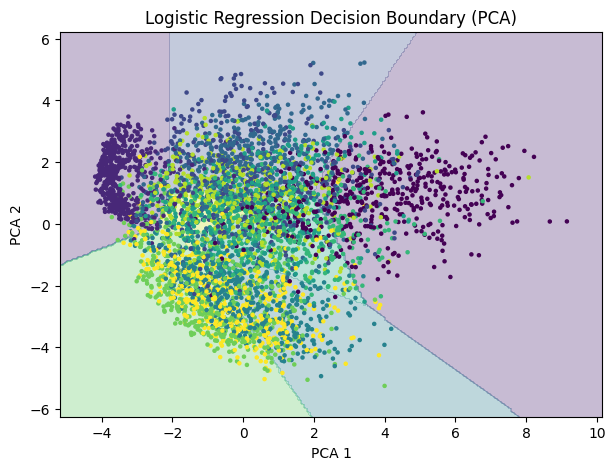

In [ ]:
# ---------------- IMPORTS ----------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# ---------------- PREP DATA ----------------
X_train = x_train.reshape(x_train.shape[0], -1)
X_test  = x_test.reshape(x_test.shape[0], -1)

y_train_lbl = np.argmax(y_train, axis=1)
y_test_lbl  = np.argmax(y_test, axis=1)

# 🔹 SMALL SUBSET (FAST & ACCEPTABLE)
X_sub = X_train[:5000]
y_sub = y_train_lbl[:5000]

# ---------------- GRID SEARCH ----------------
param_grid = {"C": [0.1, 1, 10]}

grid = GridSearchCV(
    LogisticRegression(
        solver="saga",
        max_iter=300,
        n_jobs=-1
    ),
    param_grid,
    cv=2,
    scoring="accuracy"
)

grid.fit(X_sub, y_sub)
best_C = grid.best_params_["C"]

print("Best C:", best_C)

# ---------------- FINAL MODEL ----------------
model = LogisticRegression(
    C=best_C,
    solver="saga",
    max_iter=300,
    n_jobs=-1
)

model.fit(X_sub, y_sub)
y_pred = model.predict(X_test)

# ---------------- METRICS ----------------
print("Accuracy :", accuracy_score(y_test_lbl, y_pred))
print("Precision:", precision_score(y_test_lbl, y_pred, average="weighted"))
print("Recall   :", recall_score(y_test_lbl, y_pred, average="weighted"))
print("F1 Score :", f1_score(y_test_lbl, y_pred, average="weighted"))

# ---------------- DECISION BOUNDARY (PCA) ----------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sub)

clf_2d = LogisticRegression(
    C=best_C,
    solver="saga",
    max_iter=300
)
clf_2d.fit(X_pca, y_sub)

xx, yy = np.meshgrid(
    np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
    np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200)
)

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_sub, s=5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Logistic Regression Decision Boundary (PCA)")
plt.show()


The Iris dataset consists of 150 samples with 4 features each: sepal length, sepal width, petal
length, and petal width. Each sample belongs to one of three classes: setosa, versicolor, or
virginica.

*  a. Load the Iris dataset and split it into features (X) and target labels (y).


*   b.Perform exploratory data analysis (EDA) to gain insights into the dataset.
*   c. Implement feature selection techniques:

        * a. Univariate Feature Selection
        * b. Feature Importance using Random Forest
        * c. Recursive Feature Elimination (RFE) using Support Vector Machine (SVM)
*   d. Evaluate the performance of the selected features using a classification model (e.g., SVM
or Logistic Regression).

* e. Compare the model performance before and after feature selection.









Dataset Shape: (150, 4)
Class Labels: [0 1 2]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000 

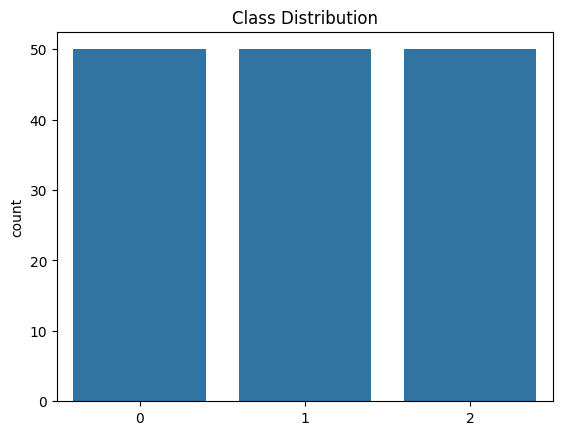

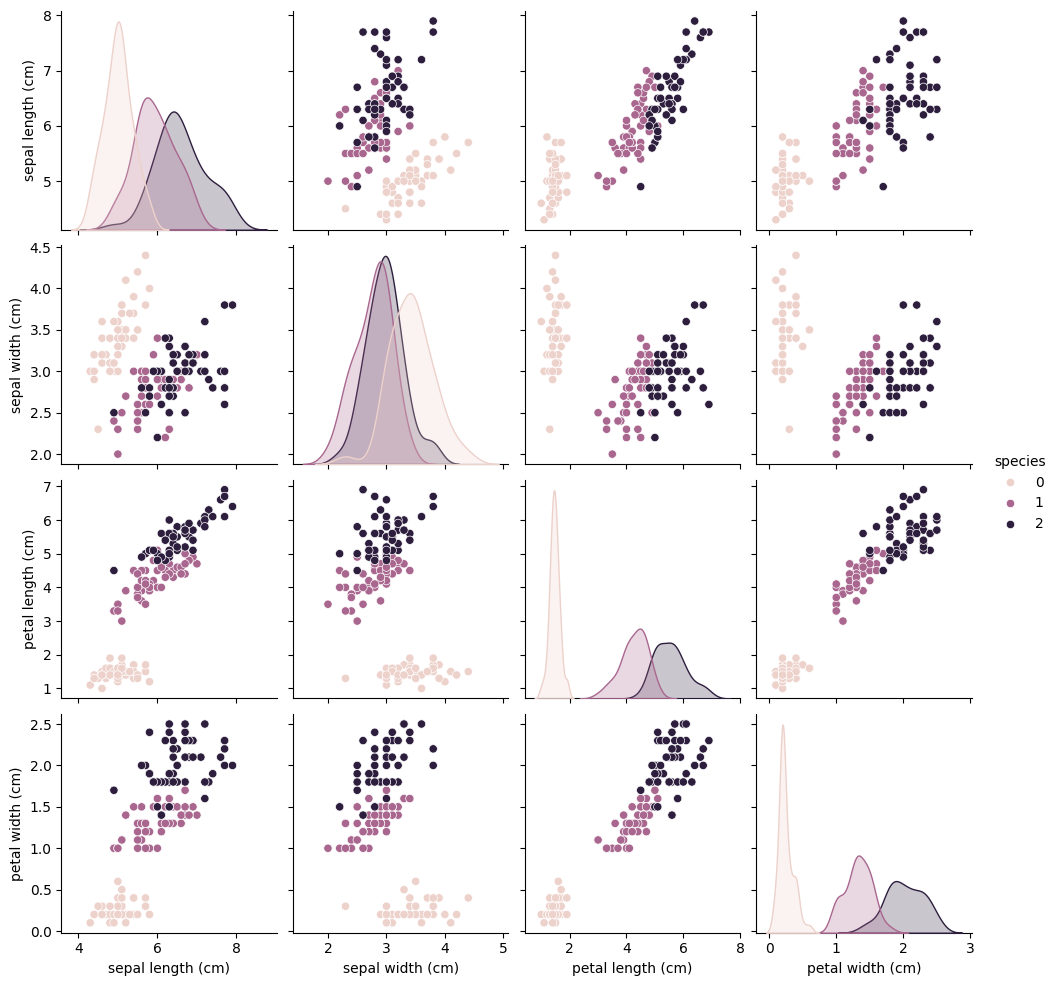

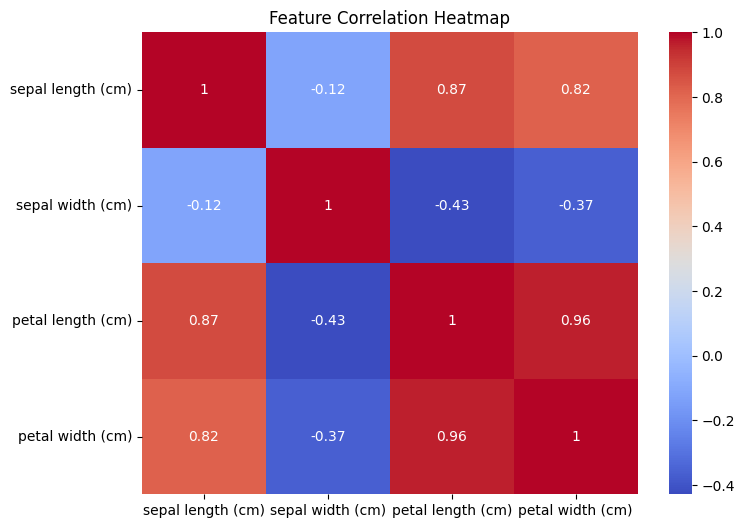


Univariate Selected Features: ['petal length (cm)', 'petal width (cm)']

Random Forest Feature Importance:
petal length (cm)    0.436130
petal width (cm)     0.436065
sepal length (cm)    0.106128
sepal width (cm)     0.021678
dtype: float64


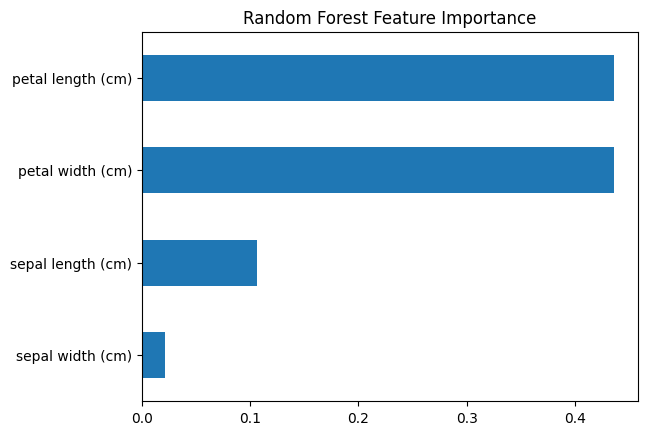


RFE Selected Features: ['petal length (cm)', 'petal width (cm)']

Model Performance Comparison
----------------------------
Accuracy with ALL features: 1.0
Accuracy with SELECTED features: 1.0


In [ ]:
# ===============================
# Feature Selection on Iris Dataset
# ===============================

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ===============================
# 2. Load Dataset and Split X, y
# ===============================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Dataset Shape:", X.shape)
print("Class Labels:", np.unique(y))

# ===============================
# 3. Exploratory Data Analysis (EDA)
# ===============================

# Dataset summary
print("\nDataset Info:")
print(X.info())

print("\nDataset Description:")
print(X.describe())

# Class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Pairplot
sns.pairplot(pd.concat([X, pd.Series(y, name="species")], axis=1),
             hue="species")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ===============================
# 4. Feature Selection Techniques
# ===============================

# ---- a) Univariate Feature Selection ----
selector = SelectKBest(score_func=f_classif, k=2)
X_uni = selector.fit_transform(X, y)
selected_uni = X.columns[selector.get_support()]

print("\nUnivariate Selected Features:", list(selected_uni))

# ---- b) Random Forest Feature Importance ----
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
rf_features = pd.Series(importances, index=X.columns)

print("\nRandom Forest Feature Importance:")
print(rf_features.sort_values(ascending=False))

rf_features.sort_values().plot(kind="barh", title="Random Forest Feature Importance")
plt.show()

# ---- c) Recursive Feature Elimination (RFE) using SVM ----
svm_linear = SVC(kernel="linear")
rfe = RFE(estimator=svm_linear, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y)
selected_rfe = X.columns[rfe.support_]

print("\nRFE Selected Features:", list(selected_rfe))

# ===============================
# 5. Model Evaluation (SVM)
# ===============================

# Train-test split (all features)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm_all = SVC()
svm_all.fit(X_train, y_train)
y_pred_all = svm_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Train-test split (selected features)
X_sel = X[selected_rfe]
X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

svm_sel = SVC()
svm_sel.fit(X_train_sel, y_train)
y_pred_sel = svm_sel.predict(X_test_sel)
acc_sel = accuracy_score(y_test, y_pred_sel)

# ===============================
# 6. Performance Comparison
# ===============================
print("\nModel Performance Comparison")
print("----------------------------")
print("Accuracy with ALL features:", acc_all)
print("Accuracy with SELECTED features:", acc_sel)
